# MAC0460 / MAC5832 (2020)
<hr>

## EP4: Logistic regression

### Topics / concepts explored in this EP:

- Implementation of the **logistic regression algorithm**, using the gradient descent technique
- Application on binary classification of images, using their feature representation
- Confusion matrix, effects of unbalanced classes

Complete and submit this notebook. **PLEASE do no change the file name.**

### Evaluation  
- Correctitude of the algorithms
- Code
    - do not change the prototype of the functions
    - efficiency (you should avoid unnecessary loops; use matrix/vector computation with NumPy wherever appropriate)
    - cleanliness (do not leave any commented code or useless variables)
- Appropriateness of the answers
- File format: Complete and submit this notebook <font color="red">with the outputs of the execution</font>. **Do no change the file name.**
<hr>

### Hints
- It might be wise to first make sure your implementation is correct. For instance, you can compare the results of your implementation and of the one implemented in <a href="https://scikit-learn.org/stable/">scikit-learn</a>. After you feel confident, paste your code in the notebook, and then run the rest of the code in the notebook.
- If you face difficulties with Keras or other libraries used in this notebook, as well as clarity issues in the exercises in this notebook, post a message in the <a href="https://edisciplinas.usp.br/mod/forum/view.php?id=2785513">Forum for discussions</a>.

# 1. Logistic regression 

Here we use the formulation described in the book [2].

The cost function to be minimized is
$$
E_{in}(\mathbf{w}) = \frac{1}{N} \sum_{i=1}^{N} \ln(1 + e^{-y^{(i)} \mathbf{w}^T \mathbf{x}^{(i)}}) \tag{1}
$$

Its gradient is given by

$$\nabla E_{in}(\mathbf{w}) = - \frac{1}{N}\sum_{i=1}^{N} \frac{y^{(i)} \mathbf{x}^{(i)}}{1 + e^{y^{(i)} \mathbf{w}^T \mathbf{x}^{(i)}}}  \tag{2}$$

The logistic (sigmoid) function is
$$\sigma(z) = \frac{1}{1 + e^{-z}}  \tag{3}$$

### <font style="background-color: #ffff66;">Exercise 1</font>
<font style="background-color: #ffff66;">In the next three code cells, write the code to implement four functions that will be used below for logistic regression training and prediction. Use vectorial computation with NumPy.</font>

### Cross-entropy loss and cross-entropy gradient
The two functions in the following cell should implement, respectively, equations (1) and (2) above. 

In [24]:
import numpy as np

def cross_entropy(w, X, y):
    """
    Computes the loss (equation 1)
    :param w: weight vector
    :type: np.ndarray(shape=(1+d, 1))
    :param X: design matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param y: class labels
    :type y: np.ndarray(shape=(N, 1))
    :return loss: loss (equation 1)
    :rtype: float
    """    
    ### Your code begins here _____________________ 
    
    N = len(y)
    return 1/N * sum(np.log(1 + np.exp(-y[i] * w.transpose() @ X[i])) for i in range(0, N))

    # sum(... for i in ...) is a shorthand notation for a summation in the usual sense

    ### Your code ends here _____________________ 

def cross_entropy_gradient(w, X, y):
    """
    Computes the gradient of the loss function (equation 2)
    :param w: weight vector
    :type: np.ndarray(shape=(1+d, 1))
    :param X: design matrix
    :type X: np.ndarray(shape=(N, 1+d))
    :param y: class labels
    :type y: np.ndarray(shape=(N, 1))
    :return grad: gradient (equation 2)
    :rtype: float
    """    
    ### Your code begins here _____________________
    
    N = len(y)
    return -1/N * sum(y[i] * X[i]/(1 + np.exp(y[i] * w.transpose() @ X[i])) for i in range(0, N))
    
    ### Your code ends here _____________________

### Logistic regression training

The function below receives the data matrix <tt>X (shape = (N, d))</tt> and the ouput vector <tt>y (shape = (N,))</tt>, and should return the final weight vector <tt>w</tt> and, optionally (when 
parameter <tt>return_history = True</tt>), a list of size <tt>num_iterations+1</tt> with the cross-entropy loss values at the beginning and after each of the iterations.

Note that the data matrix needs to be extended with a column of 1's.

In [25]:
def train_logistic(X, y, learning_rate = 1e-1, w0 = None,\
                        num_iterations = 1000, return_history = False):
    """
    Computes the weight vector applying the gradient descent technique
    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param y: class label
    :type y: np.ndarray(shape=(N, 1))
    :return: weight vector
    :rtype: np.ndarray(shape=(1+d, 1))
    :return: the history of loss values (optional)
    :rtype: list of float
    """    
     
    ### Your code begins here _____________________
    
    N,d = np.shape(X)
    
    # If we feed a initial weight we star with a weight vector of zeroes, otherwise we use the function argument itself 
    if not w0:
        w_current = np.zeros(d+1)
    else:
        w_current = w
        
    # A tuple with the history of the cost function at each iteration
    cost_history=[]
    
    # Adding one's
    Xe = np.hstack(( np.ones((X.shape[0],1)), X ))

    # Iteration to update the gradient
    for i in range(num_iterations):
        grad = cross_entropy_gradient(w_current, Xe, y)
        v = -grad
        w_current = w_current + learning_rate*v
        cost_history.append(cross_entropy(w_current, Xe, y))
    
    # If we ask for the cost history in the arguments, return it
    if return_history:
        return w_current, cost_history
    else:
        return w_current
    
    ### Your code ends here _____________________


### Logistic regression prediction
The function in the next cell will be used to do the prediction of logistic regression. Recall that the prediction is a score in $[0,1]$, given by the sigmoid value of the linear combination.

In [26]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


def predict_logistic(X, w):
    """
    Computes the logistic regression prediction
    :param X: design matrix
    :type X: np.ndarray(shape=(N, d))
    :param w: weight vector
    :rtype: np.ndarray(shape=(1+d, 1))
    :return: predicted classes 
    :rtype: np.ndarray(shape=(N, ))
    """    
    
    ### Your code begins here _____________________
    
    Xe = np.hstack(( np.ones((X.shape[0],1)), X ))
    return sigmoid(Xe@w) # Returns the signal

    ### Your code ends here _____________________


# 2. MNIST Dataset #

This is a well known dataset, commonly used as a first example of image classification tasks. We could say it is the "Hello world!" of image classification. It consists of handwritten digits, divided into $60000$ training images and $10000$ test images. All images are gray-scale (one channel with pixel intensities varying from 0 to 255) and have size $28 \times 28$. There are 10 classes, corresponding to digits 0 to 9.

The dataset is available in many places. Here we will use the one available   with Keras [1]. 
More information on MNIST can be found at the [oficial site](http://yann.lecun.com/exdb/mnist/).

[1]: François Chollet and others, Keras, https://keras.io, 2015

In [27]:
from tensorflow.keras.datasets import mnist

(X_train_all, y_train_all), (X_test_all, y_test_all) = mnist.load_data()

print(X_train_all.shape, y_train_all.shape)
print(X_test_all.shape, y_test_all.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### Class distribution of MNIST (training set)


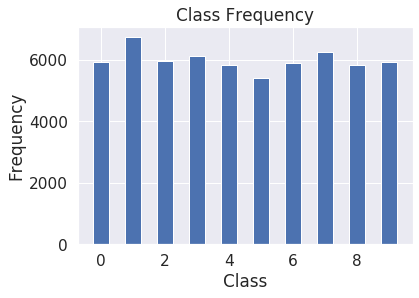

In [28]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

unique, counts = np.unique(y_train_all, return_counts=True)
plt.bar(unique, counts, 0.5)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### <font style="background-color: #ffff66;">Exercise 2</font>
<font style="background-color: #ffff66;">Repeat **Class distribution of MNIST** for the testing set (next cell) and compare and comment about the distributions of the training and of the testing sets. Do you think this type of comparison is important? Comment.</font>

We should have compatible distributions in the training set and the test set. In the sense that, if we had some classes with a frequency that were too small it would be hard to produce a reasonable hypothesis. If we know both the training and the test set we can get a reasonable idea of what kind of results we should get and how the data is distributed. Too many disparities could possibly flag some inconsistencies or a incompleteness in the data set (like missing numbers, biases and so on). This is basically a "test of sanity" to check if data we're working with makes any sense. To summarize: it's better if the set is balanced, we are more likely to find a good generalization

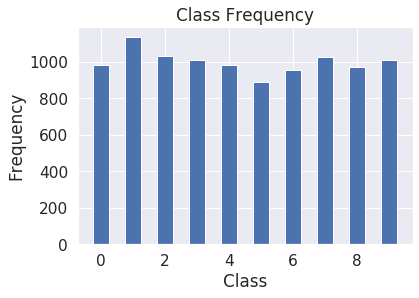

In [29]:
# Your code here ___________________
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

unique, counts = np.unique(y_test_all, return_counts=True)
plt.bar(unique, counts, 0.5)
plt.title('Class Frequency')
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

### Visualization of some of the examples

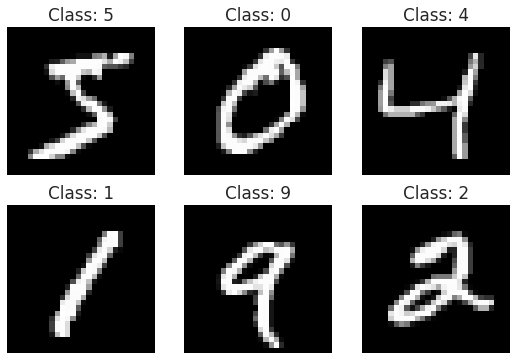

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline

# subplots defines how we divide the plot grid
fig, ax = plt.subplots(2, 3, figsize = (9, 6))

for i in range(6):
    ## The operator // works as floor division.
    ax[i//3, i%3].imshow(X_train_all[i], cmap='gray') # This command "plots" an array based on its entries values
    ax[i//3, i%3].axis('off')
    ax[i//3, i%3].set_title("Class: %d"%y_train_all[i])
    
plt.show()

# 3. Feature extraction

Note that the images consist of 28×28=784 pixel values and they could be used as "raw features" of the images. However, here we will extract some features from the images and perform classification using them instead of the pixel values.

### Mean intensity

In the book _Learning from Data_ [2], one of the attributes (features) used by the authors is the mean intensity of pixel values. This feature is directly related to the proportion of the pixels corresponding to the digit in the image. For instance, it is reasonable to expect that a digit 5 or 2 occupies more pixels than the digit 1 and, therefore, the mean intensity of the first two should be larger than that of the digit 1.

### Symmetry

The second attribute used by the authors is horizontal symmetry.

Symmetry will be defined in terms of asymetry. We define asymmetry as the pixelwise mean of the absolute difference between the pixels values from the original image and those from the corresponding horizotally flipped image. Then, symmetry is defined as the negative of asymmetry.

[2]: Yaser S Abu-Mostafa, Malik Magdon-Ismail, and Hsuan-Tien Lin, Learning from Data, 2012

In [31]:
import numpy as np

# Averages over all the entries in the matrix
def mean_intensity(image):
    return np.mean(image)

# List [a:b:n] runs through the list starting from a, until b, with a step of length n
def Hsimmetry(image):
    # The processing below invert the order of the columns of the image
    reflected_image = image[:, ::-1]
    #If the image is symmetric, this will be zero
    return -np.mean(np.abs(image - reflected_image))

## Pixels $\rightarrow$ Features ##

The above functions for feature extraction will be applied to the samples, both on the training and the test sets. After the feature extraction process below, each image will be represented by two features.

### <font style="background-color: #ffff66;">Exercise 3</font>

<font style="background-color: #ffff66;">Fill in the appropriate places in the two code cells below as indicated, to print the mean value of each feature in the training and test sets. Compare the mean values on training and test sets after normalization and comment on them.</font>


The Z-formula is a measure of how many standard deviations we are above or below the average. This is a little bit higher in the test set, as we would expect, but we can see that both features are still pretty close to the average in both cases. And of course, we normalize the parameters based only on the trainig set so we can avoid any bias.

In [32]:
import numpy as np

# Function that converts an image into a list of features,
# using the feature computation functions defined above
def convert2features(image):
    return np.array([mean_intensity(image),
                     Hsimmetry(image)])

# feature names
F = ['Mean intensity', 'Hsimmetry']

# Generate the feature representation for all images
X_train_features = np.array([convert2features(image) for image in X_train_all])
X_test_features  = np.array([convert2features(image) for image in X_test_all])

print(X_train_features.shape)
print(X_test_features.shape)

# print the mean value of each of the features
print(f"\nAverage of {F[0]} in the training set:{np.mean(X_train_features[:,0])}")
print(f"\nAverage of {F[1]} in the training set:{np.mean(X_train_features[:,1])}")
print(f"\nAverage of {F[0]} in the training set:{np.mean(X_test_features[:,0])}")
print(f"\nAverage of {F[1]} in the training set:{np.mean(X_test_features[:,1])}")

(60000, 2)
(10000, 2)

Average of Mean intensity in the training set:33.318421449829934

Average of Hsimmetry in the training set:-32.61779591836734

Average of Mean intensity in the training set:33.791224489795916

Average of Hsimmetry in the training set:-32.453224489795915


**Normalization** of feature values is a common procedure. Here we apply the z-score formula. Note that the normalization parameters (mean and standard deviation) are computed only on training data. To normalize the test data, we use the same parameters.
(We suggest you to think why we should not compute the mean and standard deviation over the training+test set. There is no need to answer this here.)

In [33]:
# Adjust the scale of feature values; standardize them.
# (Yes, the features in the test set should be standardized using
#  the statistics of the features in the training set) -- why ??
for i in range(X_train_features.shape[1]):
    avg = np.mean(X_train_features[:, i])
    stddev = np.std(X_train_features[:, i])
    X_train_features[:, i] = (X_train_features[:, i] - avg) / stddev
    X_test_features[:, i] = (X_test_features[:, i] - avg) / stddev

print(X_train_features.shape)
print(X_test_features.shape)

# print the mean value of each of the features
print("\nTraining set, after normalization")
print(f"Average of {F[0]} :", np.mean(X_train_features[:,0]))
print(f"Average of {F[1]} :", np.mean(X_train_features[:,1]))
    
print("\nTesting set, after normalization:")
print(f"Average of {F[0]} :", np.mean(X_test_features[:,0]))
print(f"Average of {F[1]} :", np.mean(X_test_features[:,1]))

(60000, 2)
(10000, 2)

Training set, after normalization
Average of Mean intensity : -1.8853067255501324e-16
Average of Hsimmetry : -5.78855482065895e-16

Testing set, after normalization:
Average of Mean intensity : 0.04282203378916951
Average of Hsimmetry : 0.020592222216913616


# 4. Logistic regression training and testing

## 4.1 Select a subset from two of the classes

Here we select two classes as well as a subset of the examples in each class. All code from here on will use the selected subset. You may change later the selected classes and the number of samples in each class.

### Select two classes

In [34]:
import numpy as np

P = 5  # positive class
N = 1  # negative class

X_train_P = X_train_features[y_train_all == P]
X_train_N = X_train_features[y_train_all == N]
y_train_P = y_train_all[y_train_all == P]
y_train_N = y_train_all[y_train_all == N]

X_test_P = X_test_features[y_test_all == P]
X_test_N = X_test_features[y_test_all == N]
y_test_P = y_test_all[y_test_all == P]
y_test_N = y_test_all[y_test_all == N]

print("Positive class: ", X_train_P.shape, y_train_P.shape)
print("Negative class: ", X_train_N.shape, y_train_N.shape)

Positive class:  (5421, 2) (5421,)
Negative class:  (6742, 2) (6742,)


### Select a subset of examples from each of the two classes

### <font style="background-color: #ffff66;">Exercise 4</font>
<font style="background-color: #ffff66;">In the following cell, write the code to change the label of the positive class to +1 and of the negative class to -1. </font>

In [35]:
# Number of positives and negatives to be effectively considered
# in the training data to be explored in the remainder of this notebook
nP = 100
nN = 100

X_train = np.concatenate([X_train_P[:nP], X_train_N[:nN]], axis = 0)
y_train = np.concatenate([y_train_P[:nP], y_train_N[:nN]], axis = 0).astype('float32')

X_test = np.concatenate([X_test_P, X_test_N], axis = 0)
y_test = np.concatenate([y_test_P, y_test_N], axis = 0).astype('float32')


# Change positive class label to +1 and negative class label to -1
### Your code begins here _____________________

y_train = np.array([(1 if y==P else -1) for y in y_train])
y_test = np.array([(1 if y==P else -1) for y in y_test])

### Your code ends here _____________________


# Shuffle
np.random.seed(56789)
def shuffle(X, y):
    # input and output must be shuffled equally
    perm = np.random.permutation(len(X))
    return X[perm], y[perm]

X_train, y_train = shuffle(X_train, y_train)
X_test, y_test = shuffle(X_test, y_test)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(200, 2) (200,)
(2027, 2) (2027,)


### Plot the selected data

Let us plot the selected subset of data. Negative examples will be plotted in red and positive ones in blue.

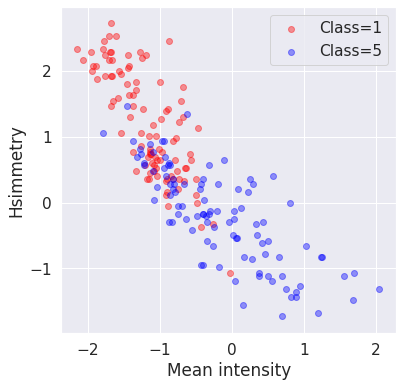

In [36]:
def plot_features(ax,X,y):
    # negatives in red
    ax.scatter(X[y==-1,0], \
               X[y==-1,1], \
               label='Class=%d'%N, c = 'red', alpha = 0.4)

    # and positives in blue
    ax.scatter(x=X[y==1,0], \
               y=X[y==1,1], \
               label='Class=%d'%P, c = 'blue', alpha = 0.4)

    ax.set_xlabel(F[0])
    ax.set_ylabel(F[1])
    ax.legend(loc='best')
    
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
plot_features(ax,X_train,y_train)
plt.show()      


## 4.2 Training

### <font style="background-color: #ffff66;">Exercise 5</font>
<font style="background-color: #ffff66;">Run the code in the following cell a few times, each time with different values for  the learning rate and the number of iterations. Comment the behavior of the loss curve. Which values do you consider as good choices?

**Note:** for your submission, keep the execution output corresponding to the best parameter values you have found.</font>

- Learning Rate = 0.2 -> The algorithm took around 500 steps to converge to a final loss of: 0.38677
- Learning Rate = 0.1 -> The algorithm took around 1000 steps to the previous loss of 0.38677
- Learning Rate = 0.05 -> The algorithm took around 2000 steps to the previous loss of 0.38677
- Learning Rate = 0.01 -> The algorithm took around 10000 steps to the previous loss of 0.38677

In all the tests the finall loss converged to roughly 0.38677. The error curves decrease pretty quickly in the first few steps (around steps = 30/learning rate, that would be around 600 steps for a learning rate of 0.05, as we see in the plot). Thus, rates between 0.1 and 0.01 usually work pretty well and converge quickly

Final weight:
 [ 1.64769278  1.03955161 -1.80458681]
Final loss:
 0.3867679785168396


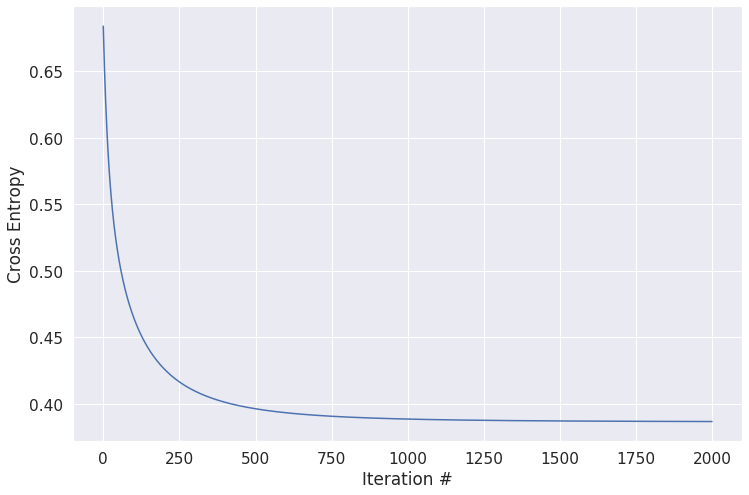

In [37]:
np.random.seed(56789)
w_logistic, loss = train_logistic(X_train, y_train,\
                                       learning_rate = 0.05,
                                       num_iterations = 2000,\
                                       return_history = True)

print("Final weight:\n", w_logistic)
print("Final loss:\n", loss[-1])

plt.figure(figsize = (12, 8))
plt.plot(loss)
plt.xlabel('Iteration #')
plt.ylabel('Cross Entropy')
plt.show()

### Ploting the scores and decision boundary

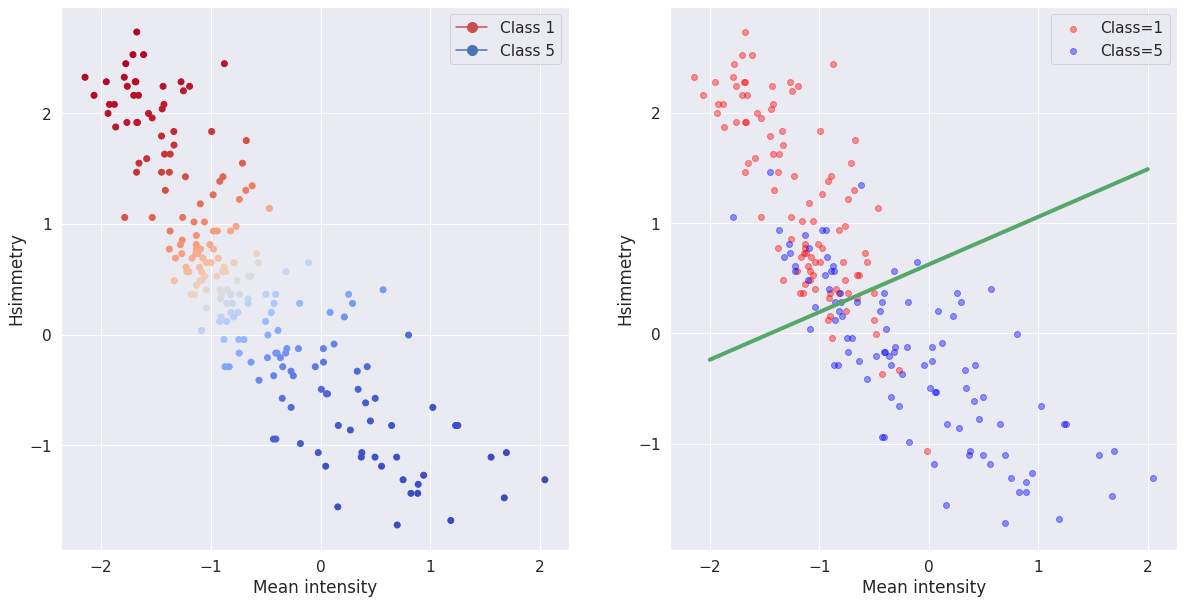

In [38]:
from matplotlib.lines import Line2D

y_pred = predict_logistic(X_train, w_logistic)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

ax1.scatter(x = X_train[:,0], y = X_train[:,1],\
            c = -y_pred, cmap = 'coolwarm')
legend_elements = [Line2D([0], [0], marker='o', color='r',\
                    label='Class %d'%N, markerfacecolor='r',\
                    markersize=10),\
Line2D([0], [0], marker='o', color='b',\
                    label='Class %d'%P, markerfacecolor='b',\
                    markersize=10)]
ax1.set_xlabel(F[0])
ax1.set_ylabel(F[1])
ax1.legend(handles=legend_elements, loc='best')
      
ax2 = fig.add_subplot(122)
plot_features(ax2,X_train,y_train)

p1 = (-2, -(w_logistic[0] - 2*w_logistic[1])/w_logistic[2])
p2 = (2,  -(w_logistic[0] + 1*w_logistic[1])/w_logistic[2])

lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
plt.setp(lines, color='g', linewidth=4.0)

plt.show()

### Confusion matrix

Recall that the logistic regression returns a score $\hat{p}$ in $[0,1]$, which can be interpreted as the probability $p(y=1|\mathbf{x})$. To compute the confusion matrix, one needs to choose a threshold value $T$ to decide the final class label (that is  $\hat{y} = 1 \Longleftrightarrow \hat{p} \geq T$ ).

In [39]:
import seaborn as sn
import pandas as pd

def plot_confusion_matrix(y, y_pred):
    """
    It receives an array with the ground-truth (y)
    and another with the prediction (y_pred), both with binary labels
    (positve=+1 and negative=-1) and plots the confusion
    matrix.
    It uses P (positive class id) and N (negative class id)
    which are "global" variables ...
    """
    TP = np.sum((y_pred == 1) * (y == 1))
    TN = np.sum((y_pred == -1) * (y == -1))

    FP = np.sum((y_pred == 1) * (y == -1))
    FN = np.sum((y_pred == -1) * (y == 1))

    total = TP+FP+TN+FN
    print("TP = %4d    FP = %4d\nFN = %4d    TN = %4d"%(TP,FP,FN,TN))
    print("Accuracy = %d / %d (%f)\n" %((TP+TN),total, (TP+TN)/total))
    confusion = [
        [TP/(TP+FN), FP/(TN+FP)],
        [FN/(TP+FN), TN/(TN+FP)]
    ]

    df_cm = pd.DataFrame(confusion, \
                         ['$\hat{y} = %d$'%P, '$\hat{y} = %d$'%N],\
                         ['$y = %d$'%P, '$y = %d$'%N])
    plt.figure(figsize = (8,4))
    sn.set(font_scale=1.4)
    sn.heatmap(df_cm, annot=True)
    plt.show()
    

### <font style="background-color: #ffff66;">Exercise 6</font>
<font style="background-color: #ffff66;">Play with the threshold value in the code (following cell). Did you manage to find a threshold value (other than 0.5) that improves accuracy? How threshold relates to TP, FP, TN and FN ? Comment.</font>

I've made two extra plots below. We can see that with a *small* threshold we'll have a lot of *false positives*. In the same spirit, with a *high* threshold we'll have a lot of *false negatives*. So ideally the threshold should be in a value in-between. In our test a threshold around 0.55 and 0.6 proved to be the best, as we can see in the last plot.

TP =   78    FP =   12
FN =   22    TN =   88
Accuracy = 166 / 200 (0.830000)



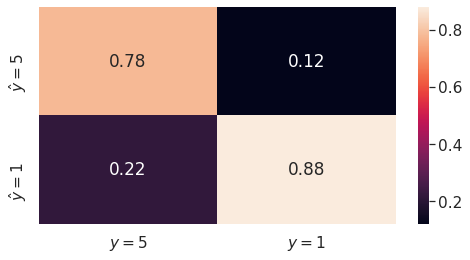

In [40]:
import seaborn as sn
import pandas as pd

threshold = 0.55

p_hat = predict_logistic(X_train, w_logistic)
y_hat = np.where(p_hat >= threshold, 1, -1) # Here we assign the class +1 to every point above the threshold

total = len(y_hat)

plot_confusion_matrix(y_train, y_hat)

**Plotting the four parameters**

Here we plot TP, TN, FP, FN

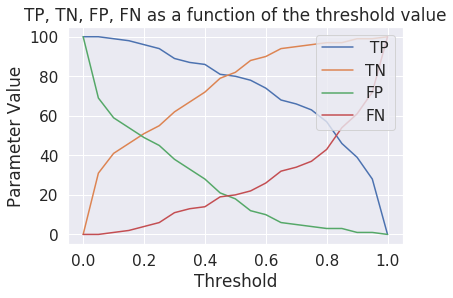

In [41]:
# Return the classification parameters
def return_parameters(y, y_pred):

    TP = np.sum((y_pred == 1) * (y == 1))
    TN = np.sum((y_pred == -1) * (y == -1))

    FP = np.sum((y_pred == 1) * (y == -1))
    FN = np.sum((y_pred == -1) * (y == 1))

    return TP, TN, FP, FN

# Records these parameters for different threshold values 
parameters_history = [[],[],[],[]]
threshold_list = np.arange(0, 1.01, 0.05)

for threshold in threshold_list:

    # Uses the logistic prediction
    p_hat = predict_logistic(X_train, w_logistic)
    y_hat = np.where(p_hat >= threshold, 1, -1)
    total = len(y_hat)

    # Stores the values
    for j in range(4):
        parameters_history[j].append(return_parameters(y_train, y_hat)[j])
        
# Plot lavels
parameter_label = [" TP", "TN", "FP", "FN"]
        
# Plots TP, TN, FP and FN
for j in range(4):
    plt.plot(threshold_list, parameters_history[j], label = parameter_label[j])

# Labels
plt.legend(loc="upper right")
plt.xlabel('Threshold')
plt.ylabel('Parameter Value')
plt.title('TP, TN, FP, FN as a function of the threshold value')

plt.show()

**Plotting the accuracy**

Here we find the optimal threshold

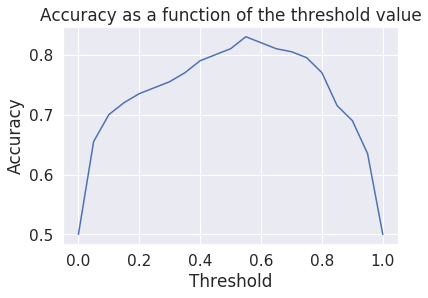

In [42]:
# total number of tests
def normalization(y, y_pred):

    TP = np.sum((y_pred == 1) * (y == 1))
    TN = np.sum((y_pred == -1) * (y == -1))

    FP = np.sum((y_pred == 1) * (y == -1))
    FN = np.sum((y_pred == -1) * (y == 1))

    return TP + TN + FP + FN

TP, TN, FP, FN = [parameters_history[j] for j in range(4)]
total = normalization(y_train, y_hat)

# Here we plot the accuracy, the ratio between true positives, true negatives and the total number of classifications
plt.plot(threshold_list, np.add(TP,TN)/total)

# Labels
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy as a function of the threshold value')

plt.show()

## 4.3 Testing

### <font style="background-color: #ffff66;">Exercise 7</font>
<font style="background-color: #ffff66;">Repeat score and boundary ploting, as well as confusion matrix ploting with respect to test set. Comment what you observed.</font>

Analysing this first plot we can see that the green line separates the two accuracies reasonably well - we were able to generalize properly. Furthermore, in the two other plots we can see that we were able to find an even greater accuracy with the test set. We get a slightly bigger proportio of false positives when the threshold is too small

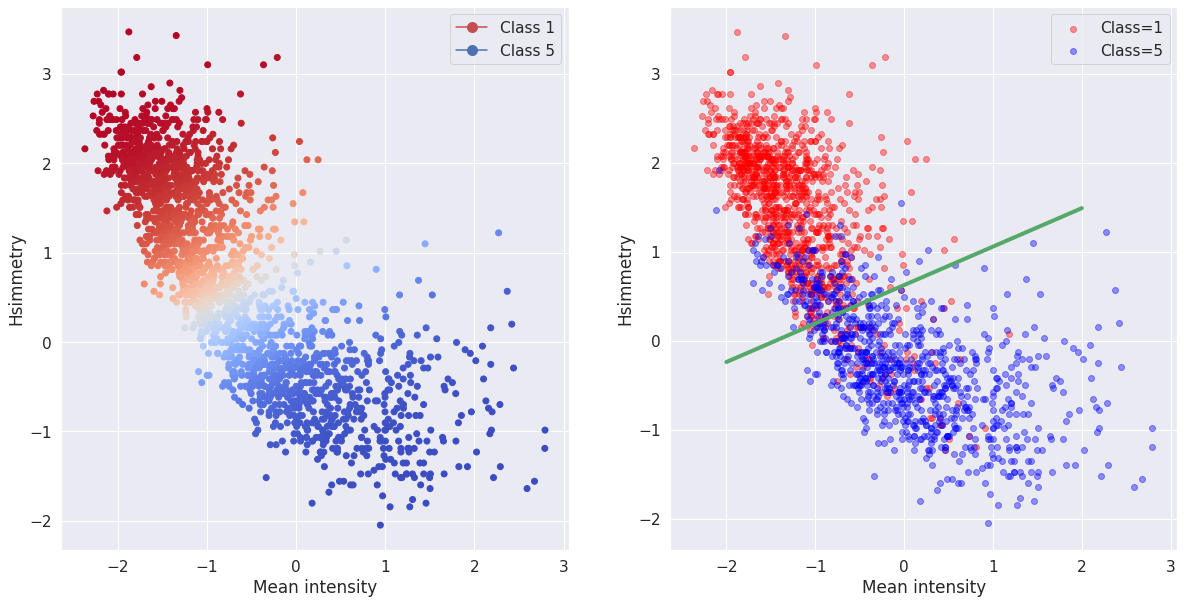

In [43]:
### Your code for score and boundary plotting (for the test set)

from matplotlib.lines import Line2D

y_pred = predict_logistic(X_test, w_logistic)

fig = plt.figure(figsize=(20,10))
ax1 = fig.add_subplot(121)

ax1.scatter(x = X_test[:,0], y = X_test[:,1],\
            c = -y_pred, cmap = 'coolwarm')
legend_elements = [Line2D([0], [0], marker='o', color='r',\
                    label='Class %d'%N, markerfacecolor='r',\
                    markersize=10),\
Line2D([0], [0], marker='o', color='b',\
                    label='Class %d'%P, markerfacecolor='b',\
                    markersize=10)]
ax1.set_xlabel(F[0])
ax1.set_ylabel(F[1])
ax1.legend(handles=legend_elements, loc='best')
      
ax2 = fig.add_subplot(122)
plot_features(ax2,X_test,y_test)

p1 = (-2, -(w_logistic[0] - 2*w_logistic[1])/w_logistic[2])
p2 = (2,  -(w_logistic[0] + 1*w_logistic[1])/w_logistic[2])

lines = ax2.plot([p1[0], p2[0]], [p1[1], p2[1]], '-')
plt.setp(lines, color='g', linewidth=4.0)

plt.show()

TP =  754    FP =  100
FN =  138    TN = 1035
Accuracy = 1789 / 2027 (0.882585)



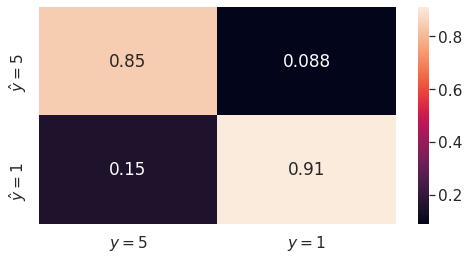

In [44]:
import seaborn as sn
import pandas as pd

threshold = 0.55

p_hat = predict_logistic(X_test, w_logistic)
y_hat = np.where(p_hat >= threshold, 1, -1) # Here we assign the class +1 to every point above the threshold

total = len(y_hat)

plot_confusion_matrix(y_test, y_hat)

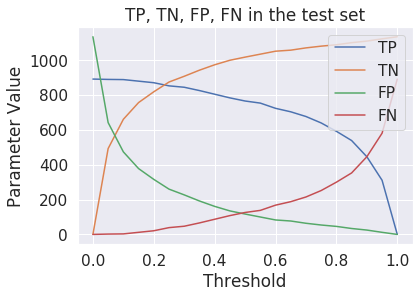

In [45]:
def return_parameters(y, y_pred):

    TP = np.sum((y_pred == 1) * (y == 1))
    TN = np.sum((y_pred == -1) * (y == -1))

    FP = np.sum((y_pred == 1) * (y == -1))
    FN = np.sum((y_pred == -1) * (y == 1))

    return TP, TN, FP, FN

parameters_history = [[],[],[],[]]
threshold_list = np.arange(0.0, 1.01, 0.05)

for threshold in threshold_list:

    p_hat = predict_logistic(X_test, w_logistic)
    y_hat = np.where(p_hat >= threshold, 1, -1)
    total = len(y_hat)

    for j in range(4):
        parameters_history[j].append(return_parameters(y_test, y_hat)[j])
        

parameter_label = ["TP", "TN", "FP", "FN"]
        
for j in range(4):
    plt.plot(threshold_list, parameters_history[j], label = parameter_label[j])

# Labels
plt.legend(loc="upper right")
plt.xlabel('Threshold')
plt.ylabel('Parameter Value')
plt.title('TP, TN, FP, FN in the test set')

plt.show()

**Plotting the accuracy**

Here we find the accuracy for the test set. It's even bigger than the accuracy in the trainign set

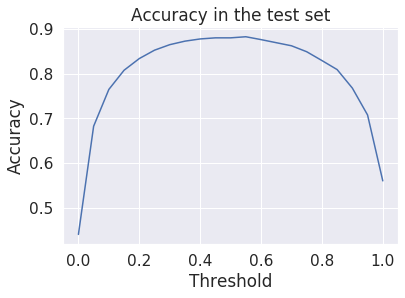

In [46]:
def normalization(y, y_pred):

    TP = np.sum((y_pred == 1) * (y == 1))
    TN = np.sum((y_pred == -1) * (y == -1))

    FP = np.sum((y_pred == 1) * (y == -1))
    FN = np.sum((y_pred == -1) * (y == 1))

    return TP + TN + FP + FN

TP, TN, FP, FN = [parameters_history[j] for j in range(4)]
total = normalization(y_test, y_hat)
plt.plot(threshold_list, np.add(TP,TN)/total)

# Labels
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy in the test set')

plt.show()

### <font style="background-color: #ffff66;">Exercise 8</font>
<font style="background-color: #ffff66;">If you got to this point, make a copy of your notebook.
Run the <i>copy notebook</i> changing the number of positive and negative examples. Try an unbalanced training set and observe if there are any effects in the accuracy on the test set. Additionaly, you may try with a different pair of classes. Summarize HERE the experiments you did and comment whatever you found interesting. There is no need to submit the <i>copy notebook</i>.</font>

After a few tests we could confirm that the final accuracy of the hypothesis depends on i) how balanced the set is ii) the number of training examples we have and iii) how similar the two categories are. I show the results of the tests I performed in the images below

**Changing the categories**

Here we did some tests for 7 and 1. Since these nubmers are more similar than 1 and 5, we got a slightly lower accuracy

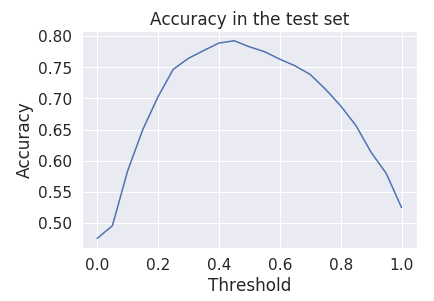
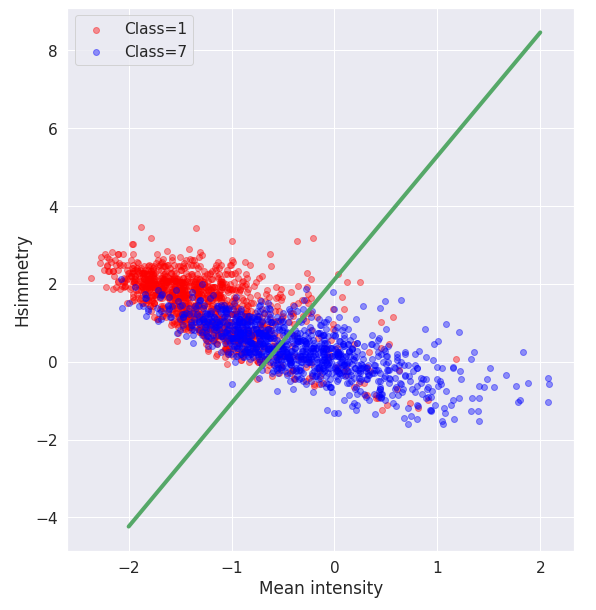

**Testing with a disbalanced set**

Here we did some tests for 5 and 1, repeating the classes in the notebooks, but this time with fewer examples and an assymetric distrubution - we have 10 positive classes and 50 negative classes. We can see that we end up with a skewed curve, since the model can't make good decisions because of the small number of positive examples, it doesn't handle the number 5 very well.
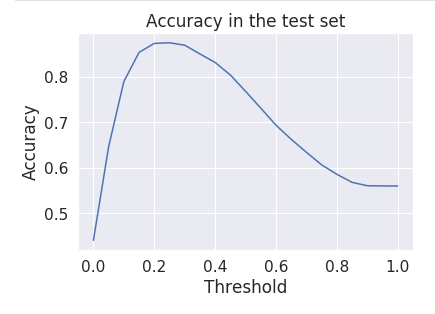
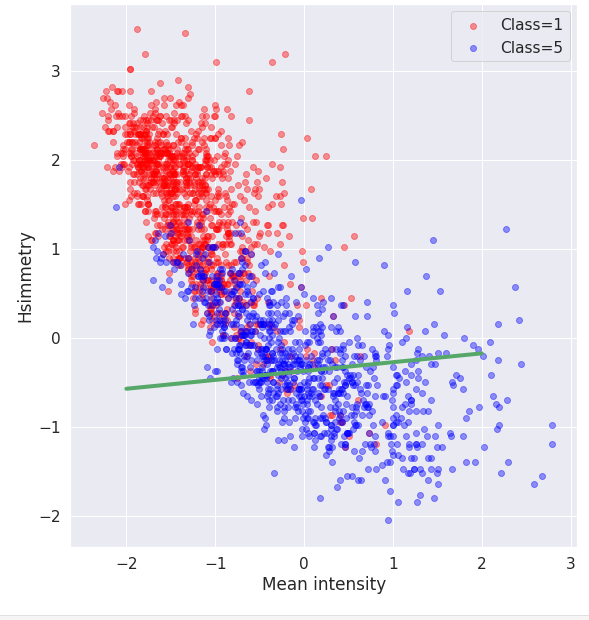

**Testing with a disbalanced set and similar numbers**

We repeat these tests but with numbers 3 and 8 and a disbalanced set, like in the previous cell. The results here are disastrous, the model is simply randomly guessing with a 50/50 chance. With so few examples and numbers this similar it couldn't generalize at all

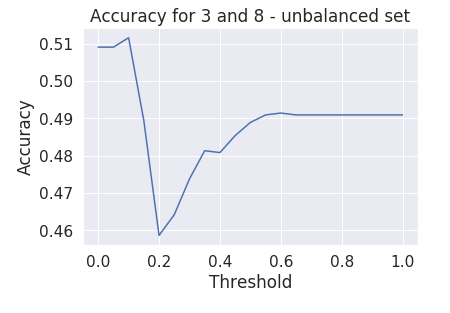
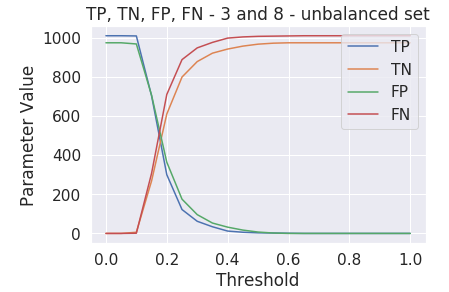

[1]: François Chollet and others, Keras, https://keras.io, 2015

[2]: Yaser S Abu-Mostafa, Malik Magdon-Ismail, and Hsuan-Tien Lin, _Learning from Data_, 2012